In [7]:
from FileFormat import FileFormat
import pandas as pd
import os
from scipy import stats
import numpy as np

variables

In [8]:
suffix = '.json'
data_dir = 'data'

pandas custom functions to calculate fps on dataframe

In [9]:
def diff_custom(x):
    vals = [get_fps(x[n],x[n+1]) for n in range(x.shape[0]-1)]
    ret = [0]
    ret = vals + ret
    return(ret)

def get_fps(t1, t2):
    return 1 / (t2 -t1).total_seconds()

create dataframe from exp files, using the FileFormat class to parse the files name.

In [10]:
fs = [x.rstrip(suffix) for x in os.listdir(data_dir) 
        if x.endswith(suffix)]
fs.sort()

data = {}
for f in fs:
    ff = FileFormat.from_string(f)
    if ff.time not in data:
        data[ff.time] = 0
    data[ff.time] += 1

df = pd.DataFrame(data.items(), columns=['time', 'num_faces'])

extract fps data, and normalized fps by num of faces.

In [11]:
fps = df[['time']].apply(diff_custom, axis=0)
df['fps'] = fps

df['norm_fps'] = df['fps'] * df['num_faces']

remove outliers using zscores

In [12]:
df = df[(np.abs(stats.zscore(df['norm_fps'])) < 3)]

plot fps data

<AxesSubplot:xlabel='time'>

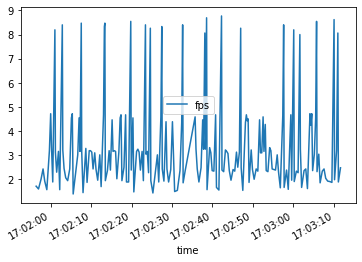

In [13]:
import matplotlib.pyplot as plot
df.plot(x='time', y='fps')

plot normalized fps data

<AxesSubplot:xlabel='time'>

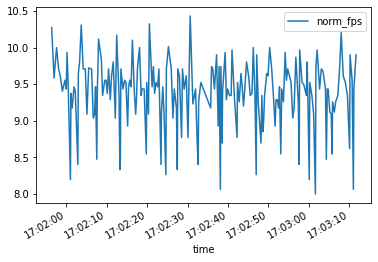

In [14]:
df.plot(x='time', y='norm_fps')